<a href="https://colab.research.google.com/github/tarasov001/ml_2022/blob/main/visitors_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание задачи: \
В данных имеется информация о сессиях пользователей. 
Необходимо определить будет ли завершена сессия транзацией.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%autosave 10

Autosaving every 10 seconds


# 0. Data uploading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/Учеба/ml/datasets/visitors_response.csv")

# 1. EDA

In [ ]:
df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Android,Google Chrome,London,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,ios,Firefox,London,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,macos,Google Chrome,East Midlands,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,Windows,Firefox,South West,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,Windows,Microsoft Edge,London,4,Returning_Visitor,True,False


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12323 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


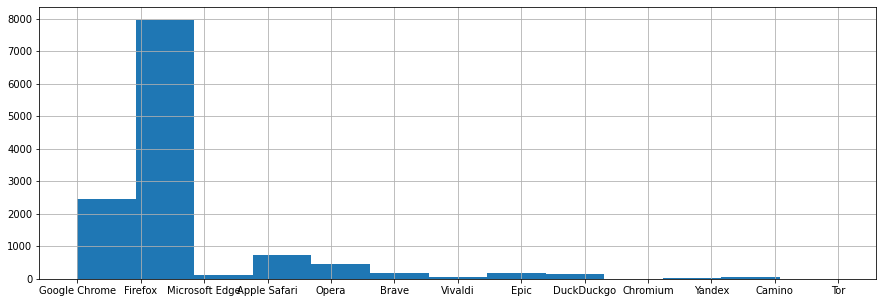

In [ ]:
df['Browser'].hist(
    figsize=(15, 5),
    bins=df['Browser'].nunique(),
)

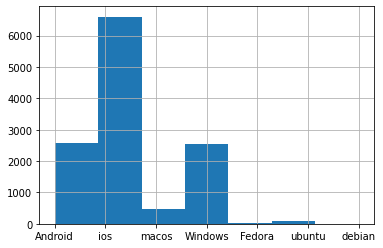

In [ ]:
df['OperatingSystems'].hist(
    bins=df['OperatingSystems'].nunique()
)

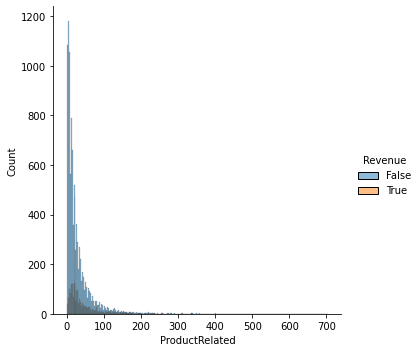

In [ ]:
sns.displot(df, x='ProductRelated', hue='Revenue')

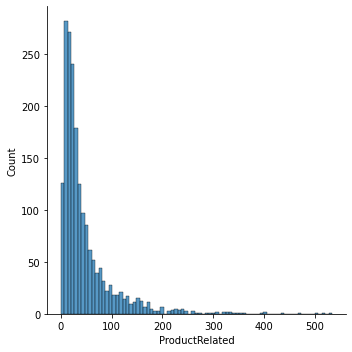

In [ ]:
sns.displot(df[df['Revenue'] == True], x='ProductRelated')

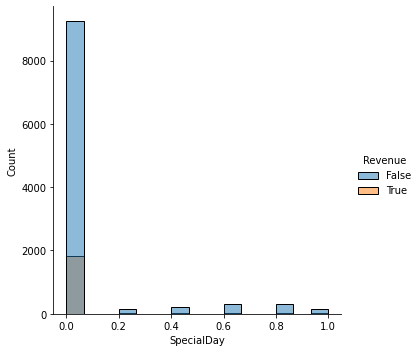

In [ ]:
sns.displot(df, x='SpecialDay', hue='Revenue')

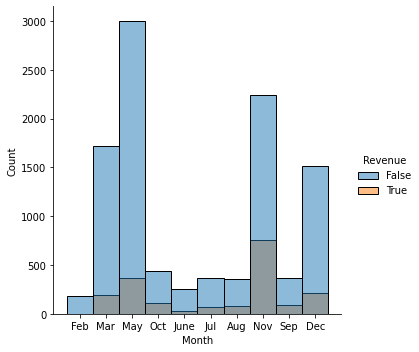

In [ ]:
sns.displot(df, x='Month', hue='Revenue')

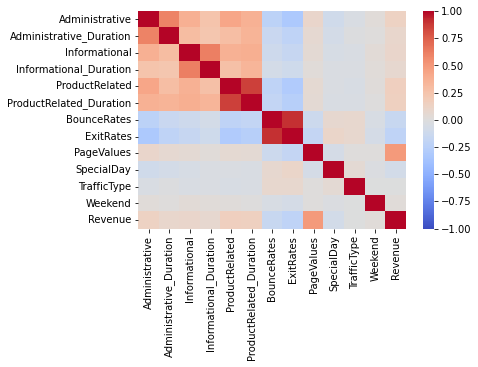

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm')

# 3. Nan values processing

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           7
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

# 4. Categorial attribute processing

In [ ]:
s = (df.dtypes == 'object')
ohe_cols = list(s[s].index)
ohe_cols

['Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType']

In [ ]:
ohe_df = pd.get_dummies(df[ohe_cols])
df = df.drop(ohe_cols, axis=1)
df = pd.concat([df, ohe_df], axis=1)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,1,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.shape

(12323, 55)

In [ ]:
s = (df.dtypes == 'bool')
boolean_cols = list(s[s].index)

for col in boolean_cols:
    df[col] = df[col].astype(int)

# 5. Data standardization

In [ ]:
df_std = (df - df.mean(axis=0)) / df.std(axis=0)
df_std.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,...,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04,1.232300e+04
mean,3.920872e-17,3.344273e-17,2.767674e-17,1.153198e-17,-4.612791e-17,1.107070e-16,-1.153198e-17,9.686860e-17,-7.380465e-17,9.225581e-17,...,-9.456221e-17,9.225581e-18,6.457907e-17,5.650669e-17,1.014814e-16,2.998314e-17,4.266831e-17,-8.533663e-17,9.225581e-18,-1.383837e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.971590e-01,-4.570578e-01,-3.963961e-01,-2.449391e-01,-7.134917e-01,-6.243280e-01,-4.575910e-01,-8.862337e-01,-3.172641e-01,-3.086220e-01,...,-7.956125e-01,-1.627477e-01,-2.565419e-01,-4.920295e-01,-3.184961e-01,-2.640061e-01,-1.910533e-01,-3.990655e-01,-8.333676e-02,-2.435229e+00
25%,-6.971590e-01,-4.570578e-01,-3.963961e-01,-2.449391e-01,-5.561276e-01,-5.280983e-01,-4.575910e-01,-5.922068e-01,-3.172641e-01,-3.086220e-01,...,-7.956125e-01,-1.627477e-01,-2.565419e-01,-4.920295e-01,-3.184961e-01,-2.640061e-01,-1.910533e-01,-3.990655e-01,-8.333676e-02,4.106057e-01
50%,-3.959392e-01,-4.146206e-01,-3.963961e-01,-2.449391e-01,-3.088412e-01,-3.113039e-01,-3.934101e-01,-3.687796e-01,-3.172641e-01,-3.086220e-01,...,-7.956125e-01,-1.627477e-01,-2.565419e-01,-4.920295e-01,-3.184961e-01,-2.640061e-01,-1.910533e-01,-3.990655e-01,-8.333676e-02,4.106057e-01
75%,5.077203e-01,6.981966e-02,-3.963961e-01,-2.449391e-01,1.407704e-01,1.407618e-01,-1.119554e-01,1.428604e-01,-3.172641e-01,-3.086220e-01,...,1.256791e+00,-1.627477e-01,-2.565419e-01,-4.920295e-01,-3.184961e-01,-2.640061e-01,-1.910533e-01,-3.990655e-01,-8.333676e-02,4.106057e-01
max,7.435776e+00,1.877410e+01,1.849723e+01,1.786315e+01,1.513532e+01,3.280123e+01,3.668325e+00,3.230143e+00,1.916049e+01,4.720668e+00,...,1.256791e+00,6.143982e+00,3.897683e+00,2.032233e+00,3.139501e+00,3.787484e+00,5.233716e+00,2.505651e+00,1.199853e+01,4.106057e-01


# 6. Sampling

In [ ]:
from sklearn.model_selection import train_test_split

X = df_std.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# 7. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

kn_model = KNeighborsClassifier(n_neighbors=3)
kn_model.fit(X_train, y_train)
y_test_prediction = kn_model.predict(X_test)

In [ ]:
 def print_model_scores(model, X_train, y_train, X_test, y_test, y_test_prediction):
    print('Train accuracy:', round(model.score(X_train, y_train), 2))
    print()
    print('Test scores:')
    print(classification_report(y_test, y_test_prediction))
    print()
    print('Confusion matrix:\n')
    sns.heatmap(confusion_matrix(y_test, y_test_prediction), annot=True, cbar=False, fmt='1', cmap='Reds')
    plt.show()

Train accuracy: 0.9

Test scores:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3112
           1       0.56      0.28      0.37       585

    accuracy                           0.85      3697
   macro avg       0.72      0.62      0.65      3697
weighted avg       0.83      0.85      0.83      3697


Confusion matrix:



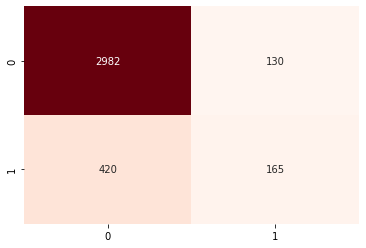

In [ ]:
print_model_scores(
    kn_model, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    y_test_prediction
)

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=20)
kn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

Train accuracy: 0.86

Test scores:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3112
           1       0.56      0.28      0.37       585

    accuracy                           0.85      3697
   macro avg       0.72      0.62      0.65      3697
weighted avg       0.83      0.85      0.83      3697


Confusion matrix:



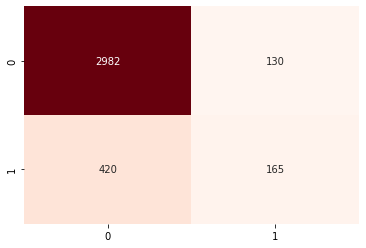

In [ ]:
print_model_scores(
    kn_model, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    y_test_prediction
)

# 8. Over-sampling

In [ ]:
! pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 225 kB 5.3 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


## 8.1. Random over-sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X_ROS_train, y_ROS_train = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)
y_ROS_train.value_counts()

0    7304
1    7304
Name: Revenue, dtype: int64

Train accuracy: 0.95

Test scores:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3112
           1       0.37      0.51      0.43       585

    accuracy                           0.78      3697
   macro avg       0.63      0.67      0.65      3697
weighted avg       0.82      0.78      0.80      3697


Confusion matrix:



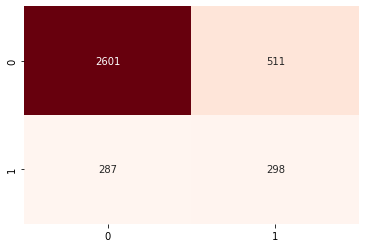

In [ ]:
kn_model_2 = KNeighborsClassifier(n_neighbors=3)
kn_model_2.fit(X_ROS_train, y_ROS_train)

y_test_prediction = kn_model_2.predict(X_test)

print_model_scores(
    kn_model_2, 
    X_ROS_train, 
    y_ROS_train, 
    X_test, 
    y_test, 
    y_test_prediction
)

## 8.2. SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

X_SMOTE_train, y_SMOTE_train = SMOTE().fit_resample(X_train, y_train)
y_SMOTE_train.value_counts()

0    7304
1    7304
Name: Revenue, dtype: int64

Train accuracy: 0.95

Test scores:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3112
           1       0.36      0.54      0.43       585

    accuracy                           0.77      3697
   macro avg       0.63      0.68      0.64      3697
weighted avg       0.82      0.77      0.79      3697


Confusion matrix:



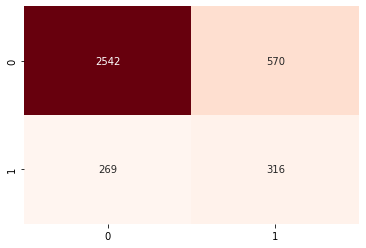

In [ ]:
kn_model_2 = KNeighborsClassifier(n_neighbors=3)
kn_model_2.fit(X_SMOTE_train, y_SMOTE_train)

y_test_prediction = kn_model_2.predict(X_test)

print_model_scores(
    kn_model_2, 
    X_SMOTE_train, 
    y_SMOTE_train, 
    X_test, 
    y_test, 
    y_test_prediction
)

## 8.3. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

X_ADASYN_train, y_ADASYN_train = ADASYN().fit_resample(X_train, y_train)
y_ADASYN_train.value_counts()

0    7304
1    7163
Name: Revenue, dtype: int64

Train accuracy: 0.54

Test scores:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      3112
           1       0.36      0.55      0.43       585

    accuracy                           0.77      3697
   macro avg       0.63      0.68      0.64      3697
weighted avg       0.82      0.77      0.79      3697


Confusion matrix:



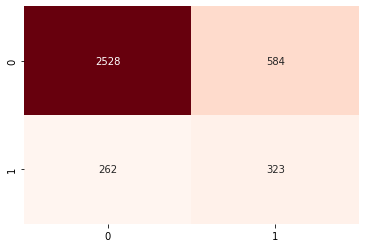

In [ ]:
kn_model_2 = KNeighborsClassifier(n_neighbors=3)
kn_model_2.fit(X_ADASYN_train, y_ADASYN_train)

y_test_prediction = kn_model_2.predict(X_test)

print_model_scores(
    kn_model, 
    X_ADASYN_train, 
    y_ADASYN_train, 
    X_test, y_test, 
    y_test_prediction
)

# 9. XGBoost

Train accuracy: 0.93

Test scores:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3112
           1       0.63      0.73      0.68       585

    accuracy                           0.89      3697
   macro avg       0.79      0.82      0.81      3697
weighted avg       0.90      0.89      0.89      3697


Confusion matrix:



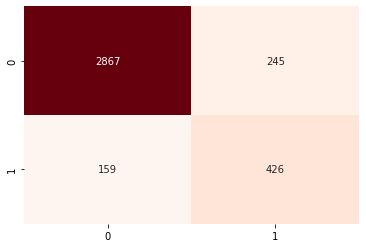

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(X_SMOTE_train, y_SMOTE_train)

y_test_prediction = xgb_model.predict(X_test)

print_model_scores(
    xgb_model, 
    X_SMOTE_train, 
    y_SMOTE_train, 
    X_test, y_test, 
    y_test_prediction
)

# 10. CatBoost

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Train accuracy: 0.95

Test scores:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3112
           1       0.67      0.72      0.69       585

    accuracy                           0.90      3697
   macro avg       0.81      0.82      0.82      3697
weighted avg       0.90      0.90      0.90      3697


Confusion matrix:



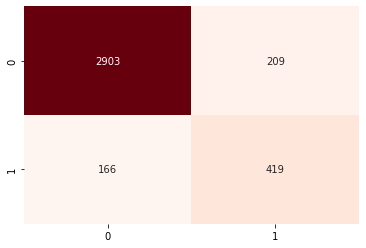

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    random_state=0,
    learning_rate=0.01,
)
cat_model.fit(
    X_SMOTE_train, 
    y_SMOTE_train,
    verbose=False,
)

y_test_prediction = cat_model.predict(X_test)

print_model_scores(
    cat_model, 
    X_SMOTE_train,
    y_SMOTE_train,
    X_test, y_test,
    y_test_prediction
)

In [ ]:
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9],
# }

# cat_model_2 = CatBoostClassifier(random_state=0)
# cat_model_2.grid_search(
#     grid,
#     X=X_SMOTE_train,
#     y=y_SMOTE_train,
#     verbose=False,
# )

# Conclusions

Для решения задачи сначала были предобработаны имеющиеся данные. Так как объектов с пропущенными значениями было очень мало, то они были просто удалены. Категориальные переменные были обработаны с помощью подхода One Hot Encoding. Также данные были стандартизованы. Тренировочные и тестовые выборки были созданы с помощью функции train_test_split из библиотеки sklearn в соотношении 70:30. Первым был применен наиболее простой метод машинного обучения для задачи классификации - Метод ближайших соседей. На тренировочной выборки показатель accuracy был 0.9, а на тестовой 0.85, это является хорошим результатом, но после изучения других показателей и матрицы расогласований, стало ясно, что из-за несбалансированности классов разработанная модель просто отдает предпочтение нулевому классу. Было принято решение бороться с дисбалансом с помощью подхода Over-sampling. Протестировано несколько методов и по итогу выбран SMOTE. После обновления данных accuracy на тестовой выборке упал до 0.77, а на тренировочной вырос до 0.95, что свидетельствует о переобучении. Было принято решение не бороться с переобучением, а сразу перейти к более сложному алгоритму градиентного бустинга. Были выбраны две библиотеки, в которых реализуется данный алгоритм: XGBoost и CatBoost. В первой показатель accuracy был 0.93 и 0.89 на тренировочной и тестовой выборках соответсвенно, а f1-score 93 и 68, что является значимым улучшением модели. Модель из библиотеки CatBoost дала еще более хорошие значения показателей качества модели: accuracy 0.95 и 0.9, на тренировочной и тестовой выборках соответсвенно, а f1-score 0.94 и 0.69. Таким образом для решения данной задачи мною была выбрана модель машинного обучения реализованная методом градиентного бустинга из библиотеки CatBoost.

#11. NN

## 11.1. MPL

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(hidden_layer_sizes=(10, 5), random_state=88)
MLP_model.fit(X_SMOTE_train, y_SMOTE_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), random_state=88)

Train accuracy: 0.92

Test scores:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3112
           1       0.52      0.77      0.62       585

    accuracy                           0.85      3697
   macro avg       0.74      0.82      0.76      3697
weighted avg       0.88      0.85      0.86      3697


Confusion matrix:



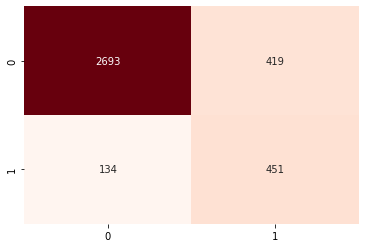

In [ ]:
y_test_prediction = MLP_model.predict(X_test)

print_model_scores(
    MLP_model, 
    X_SMOTE_train, 
    y_SMOTE_train, 
    X_test, y_test, 
    y_test_prediction
)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


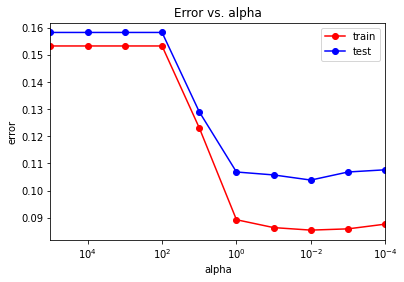

In [ ]:
from sklearn.metrics import mean_squared_error

alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (10, 5), random_state = 88, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_train_pred))
    test_err.append(mean_squared_error(y_test, y_test_pred))

plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

По качеству MLP модель оказалась сравнима с моделями градиентного бустинга, но у нее в два раза больше ошибок первого рода  
Модель очень плохо различает 1 класс